# Construction of Building Typologies from a Regional Material Catalog:
## Assessment of Urban Heat Demand and the Environmental Impact of Retrofit policies.

# (g) Mapping

**Supplementary material to the paper with the same name**

[M. Esteban Munoz H.](emunozh@gmail.com)

Thu Mar 12, 2015

In [3]:
import pandas as pd
import numpy as np

In [4]:
buildings = pd.read_csv("buildings_merged.csv", index_col="UUID")

In [5]:
buildings_goup = buildings.groupby("bb").apply(sum)
del buildings_goup["bja"]

In [6]:
buildings_goup["genergy"] = buildings_goup["XPS_24cm"] / buildings_goup["sqm"]

In [7]:
buildings_goup.head()

,sqm,shell,aog,heat_demand,bb,heat_r1,heat_r2,heat_r3,heat_r4,heat_r5,heat_r6,Steinwolle_12cm,Steinwolle_24cm,XPS_12cm,XPS_24cm,EPS_12cm,EPS_24cm,genergy
bb,,,,,,,,,,,,,,,,,,
134010,6136.111403,7273.963254,11,546258.286043,670050,NaN,NaN,NaN,NaN,NaN,NaN,442025.944768,884051.889536,3406749.633568,6813499.267136,340534.954112,681069.908224,1110.393671
134011,8764.426510,11917.811099,16,700793.704140,804066,87123.297909,79864.440166,81640.741408,75598.302609,84657.844145,77865.094572,724224.405168,1448448.810335,5581688.713367,11163377.426733,557939.477309,1115878.954617,1273.714534
134025,8217.496998,12166.789163,89,645235.557542,2412450,55608.861572,47874.907469,49568.771308,44215.367519,52723.841432,46093.498127,739354.363899,1478708.727798,5698297.211067,11396594.422133,569595.534749,1139191.069498,1386.869314
134026,8701.880918,46408.409885,5,268960.842719,134026,NaN,NaN,NaN,NaN,NaN,NaN,2820157.389924,5640314.779847,21735308.228961,43470616.457922,2172637.553823,4345275.107645,4995.542558
134029,16920.708625,63073.509166,31,1081158.802603,1742377,106682.060202,96419.991736,98928.772158,90402.856515,103193.801076,93598.472749,3832866.142654,7665732.285309,29540382.146261,59080764.292521,2952824.175722,5905648.351443,3491.624707


In [9]:
buildings_goup.to_csv("buildings_group.csv")

# Geometry

In [9]:
buildings_geometry = pd.read_csv("buildings_geometry.csv", index_col=0)

In [10]:
buildings_geometry.head()

,Geometry,SimpleGeometry,_id
0,"POLYGON ((32565445.41 5930054.472999999, 32565...","POLYGON ((32565446.10915073 5930047.197849273,...",53d2aa37e138234a2bacb322
1,"POLYGON ((32565421.859 5930068.776000001, 3256...","POLYGON ((32565426.03886436 5930069.854135637,...",53d2aa38e138234a2bacb324
2,"POLYGON ((32565444.302 5930031.42, 32565443.41...","POLYGON ((32565455.53866914 5930022.927330863,...",53d2aa38e138234a2bacb325
3,"POLYGON ((32565406.947 5930051.098999999, 3256...","POLYGON ((32565404.23378118 5929957.975218822,...",53d2aa39e138234a2bacb327
4,"POLYGON ((32565438.704 5930064.393999999, 3256...","POLYGON ((32565446.60672145 5930065.478278549,...",53d2aa3ae138234a2bacb328


In [11]:
from shapely.wkt import loads
from shapely.ops import cascaded_union

In [12]:
A = [loads(g) for g in buildings_geometry.Geometry]
B = [loads(g) for g in buildings_geometry.SimpleGeometry]

In [13]:
polygons_A = cascaded_union(A)
polygons_B = cascaded_union(B)

In [14]:
from matplotlib.patches import Polygon
import pylab as pl
import matplotlib
pd.options.display.mpl_style = 'default'
%matplotlib inline

In [15]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)

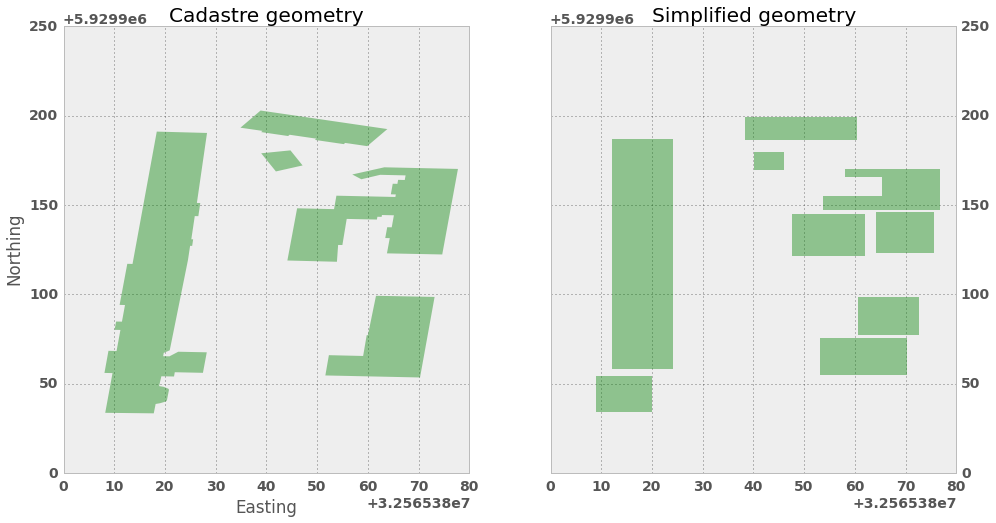

In [17]:
fig, (ax1, ax2) = pl.subplots(figsize=(16, 8), ncols=2)

for polygon in polygons_A:
    mpl_poly = Polygon(np.array(polygon.exterior), facecolor="g", lw=0, alpha=0.4)
    ax1.add_patch(mpl_poly)
ax1.set_title("Cadastre geometry")
ax1.relim()
ax1.autoscale()
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
ax1.set_ylabel("Northing")
ax1.set_xlabel("Easting")

for polygon in polygons_B:
    mpl_poly = Polygon(np.array(polygon.exterior), facecolor="g", lw=0, alpha=0.4)
    ax2.add_patch(mpl_poly)
ax2.set_title("Simplified geometry")
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
#ax2.set_yticks([])
ax2.yaxis.tick_right()

#fig.savefig("FIGURES/geometry.png", bbox_inches="tight");